<a href="https://colab.research.google.com/github/satish-tec/ML-Assignment/blob/main/Clustring_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [16]:
file_path = "/content/drive/MyDrive/Datasets/csv3.csv"
df = pd.read_csv(file_path)

if df.columns[0] != "Weight" or df.columns[1] != "Height":
    df.columns = ["Weight", "Height"]

In [17]:
print("Dataset preview:\n", df.head())
print("Missing values:\n", df.isnull().sum())

Dataset preview:
       Weight      Height
0  67.062924  176.086355
1  68.804094  178.388668
2  60.930863  170.284496
3  59.733843  168.691992
4  65.431230  173.763679
Missing values:
 Weight    0
Height    0
dtype: int64


In [18]:
features = ['Weight', 'Height']
X = df[features]

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

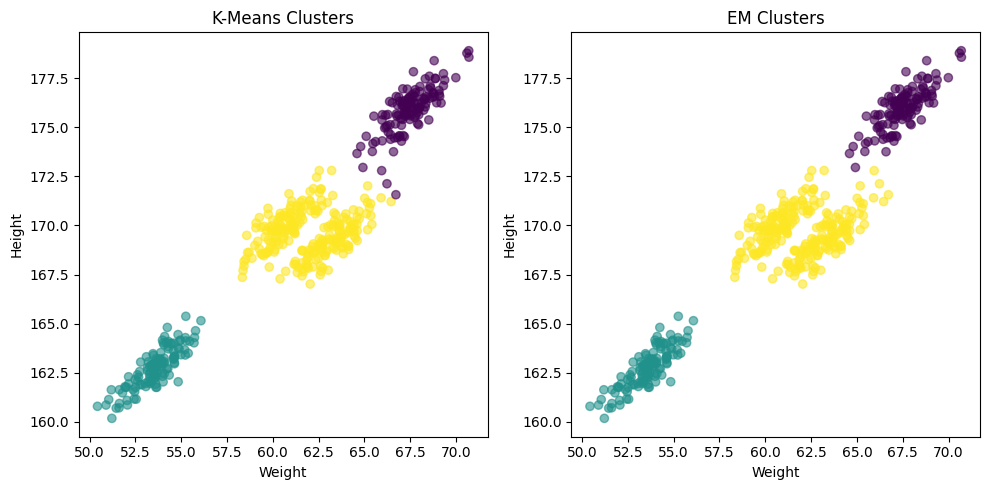

In [20]:
 # K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Expectation-Maximization (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['Weight'], df['Height'], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title('K-Means Clusters')
plt.xlabel('Weight')
plt.ylabel('Height')

plt.subplot(1, 2, 2)
plt.scatter(df['Weight'], df['Height'], c=gmm_labels, cmap='viridis', alpha=0.6)
plt.title('EM Clusters')
plt.xlabel('Weight')
plt.ylabel('Height')

plt.tight_layout()
plt.show()